### <center> IS445 Data Visualization </center>
# <center> Final Project - Phase Three </center>
### <center> GROUP A </center>
#### <center> Chia-Yi Lee, Mayur Sridhar Sharma, Meg Wu, Sanjana Kukreja, Simran Malawat</center>
## <center> Divvy Bike Share System </center>

### We deploy the jupyter notebook with **voila**.
## Check the information of our deployment with Voila and the website in our [Github](https://github.com/chiayi0327/data-visualization-voila).

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime as dt
import calendar
from datetime import datetime
import os
import datetime
import ipywidgets
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
from ipywidgets import interact, interact_manual

## <center>Our prototype of dashboard</center>

## Number of Rides - Weekly Statistic

In [163]:
df = pd.read_csv("Divvy_Trips_2019_Q1.csv")

In [164]:
df.head()

trip_id           start_time             end_time  bikeid tripduration  \
0  21742443  2019-01-01 00:04:37  2019-01-01 00:11:07    2167        390.0   
1  21742444  2019-01-01 00:08:13  2019-01-01 00:15:34    4386        441.0   
2  21742445  2019-01-01 00:13:23  2019-01-01 00:27:12    1524        829.0   
3  21742446  2019-01-01 00:13:45  2019-01-01 00:43:28     252      1,783.0   
4  21742447  2019-01-01 00:14:52  2019-01-01 00:20:56    1170        364.0   

   from_station_id                    from_station_name  to_station_id  \
0              199               Wabash Ave & Grand Ave             84   
1               44               State St & Randolph St            624   
2               15                 Racine Ave & 18th St            644   
3              123       California Ave & Milwaukee Ave            176   
4              173  Mies van der Rohe Way & Chicago Ave             35   

                  to_station_name    usertype  gender  birthyear  
0       Milwaukee Ave & Grand Ave  Subscriber    Male     1989.0  
1  Dearborn St & Van Buren St (*)  Subscriber  Female     1990.0  
2   Western Ave & Fillmore St (*)  Subscriber  Female     1994.0  
3               Clark St & Elm St  Subscriber    Male     1993.0  
4         Streeter Dr & Grand Ave  Subscriber    Male     1994.0

In [165]:
df['start_date'] = pd.to_datetime(df['start_time'], format='%Y/%m/%d').dt.date
df['week_day'] = pd.to_datetime(df['start_date'], format='%Y/%m/%d').dt.weekday


df['day_of_week'] =pd.to_datetime(df['start_time'], format='%Y/%m/%d').dt.day_name()
df['start_hour'] = pd.to_datetime(df['start_time'], format='%Y/%m/%d').dt.hour

df

trip_id           start_time             end_time  bikeid  \
0       21742443  2019-01-01 00:04:37  2019-01-01 00:11:07    2167   
1       21742444  2019-01-01 00:08:13  2019-01-01 00:15:34    4386   
2       21742445  2019-01-01 00:13:23  2019-01-01 00:27:12    1524   
3       21742446  2019-01-01 00:13:45  2019-01-01 00:43:28     252   
4       21742447  2019-01-01 00:14:52  2019-01-01 00:20:56    1170   
...          ...                  ...                  ...     ...   
365064  22178524  2019-03-31 23:51:32  2019-04-01 00:04:09    1501   
365065  22178525  2019-03-31 23:52:37  2019-03-31 23:58:09    3270   
365066  22178526  2019-03-31 23:52:38  2019-04-01 00:06:44    3584   
365067  22178527  2019-03-31 23:53:08  2019-03-31 23:56:06    4384   
365068  22178528  2019-03-31 23:53:48  2019-04-01 00:01:16    5589   

       tripduration  from_station_id                    from_station_name  \
0             390.0              199               Wabash Ave & Grand Ave   
1             441.0               44               State St & Randolph St   
2             829.0               15                 Racine Ave & 18th St   
3           1,783.0              123       California Ave & Milwaukee Ave   
4             364.0              173  Mies van der Rohe Way & Chicago Ave   
...             ...              ...                                  ...   
365064        757.0               38                   Clark St & Lake St   
365065        332.0              129            Blue Island Ave & 18th St   
365066        846.0              283            LaSalle St & Jackson Blvd   
365067        178.0              321                  Wabash Ave & 9th St   
365068        448.0              248               Woodlawn Ave & 55th St   

        to_station_id                 to_station_name    usertype  gender  \
0                  84       Milwaukee Ave & Grand Ave  Subscriber    Male   
1                 624  Dearborn St & Van Buren St (*)  Subscriber  Female   
2                 644   Western Ave & Fillmore St (*)  Subscriber  Female   
3                 176               Clark St & Elm St  Subscriber    Male   
4                  35         Streeter Dr & Grand Ave  Subscriber    Male   
...               ...                             ...         ...     ...   
365064             29        Noble St & Milwaukee Ave  Subscriber    Male   
365065            202            Halsted St & 18th St  Subscriber    Male   
365066            273          Michigan Ave & 18th St  Subscriber    Male   
365067             39           Wabash Ave & Adams St  Subscriber    Male   
365068            247              Shore Dr & 55th St  Subscriber    Male   

        birthyear  start_date  week_day day_of_week  start_hour  
0          1989.0  2019-01-01         1     Tuesday           0  
1          1990.0  2019-01-01         1     Tuesday           0  
2          1994.0  2019-01-01         1     Tuesday           0  
3          1993.0  2019-01-01         1     Tuesday           0  
4          1994.0  2019-01-01         1     Tuesday           0  
...           ...         ...       ...         ...         ...  
365064     1993.0  2019-03-31         6      Sunday          23  
365065     1992.0  2019-03-31         6      Sunday          23  
365066     1984.0  2019-03-31         6      Sunday          23  
365067     1969.0  2019-03-31         6      Sunday          23  
365068     1998.0  2019-03-31         6      Sunday          23  

[365069 rows x 16 columns]

Text(0.5, 1.0, 'No. of rides')

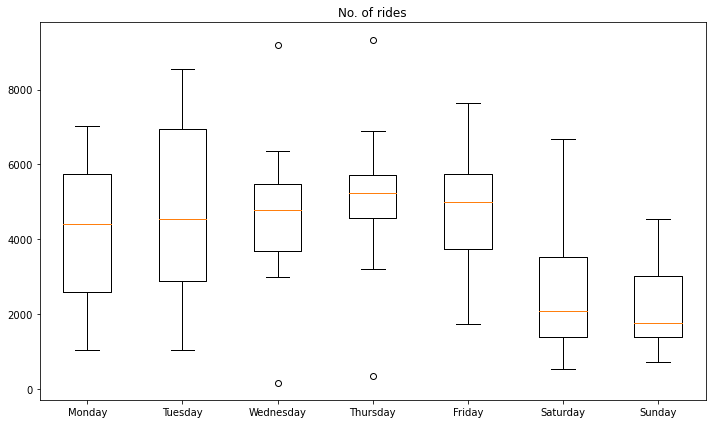

In [166]:
day_names = [calendar.day_name[x] for x in range(7)]

dso = df.groupby(['week_day', 'start_date']).size().to_frame()
dso.columns = ['count_per_day']
dso.reset_index(inplace=True)

days = []


for i in range(7):
    days.append(dso[(dso.week_day == i)].count_per_day)

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
ax.boxplot(days, labels=day_names)
ax.set_title("No. of rides")

## Rush Hour

Text(0, 0.5, 'No. of rides')

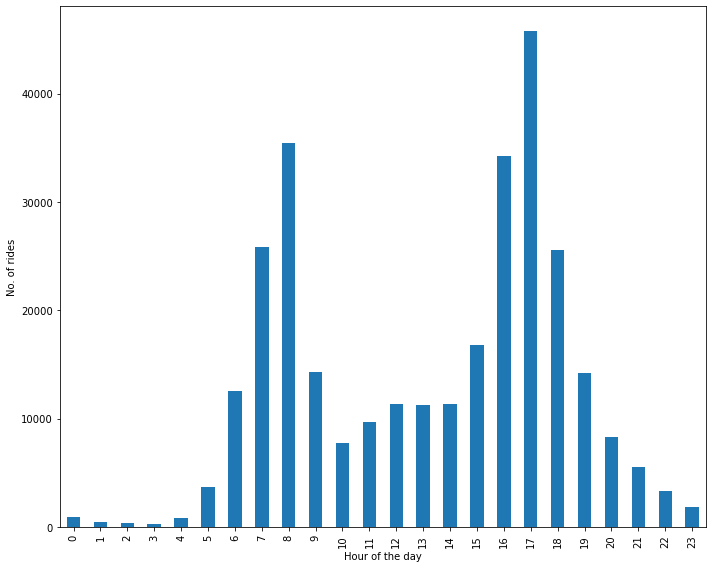

In [167]:
group_weekdays = df[(df.week_day != 5) & (df.week_day != 6)].groupby('start_hour').size()



fig, ax = plt.subplots(1, 1, figsize = (10, 8))

ax= group_weekdays.plot(kind='bar')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('No. of rides')

## Total Number of Trips in a Day 

In [168]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'start_date',
       'week_day', 'day_of_week', 'start_hour'],
      dtype='object')

In [169]:
df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
start_date            object
week_day               int64
day_of_week           object
start_hour             int64
dtype: object

In [170]:
df['start_time_grouped'] = pd.to_datetime(df['start_time']).dt.date

In [171]:
df['start_time_grouped']

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
365064    2019-03-31
365065    2019-03-31
365066    2019-03-31
365067    2019-03-31
365068    2019-03-31
Name: start_time_grouped, Length: 365069, dtype: object

In [172]:
x = df['start_time_grouped'].unique()
y = df.groupby('start_time_grouped')['trip_id'].count()

In [173]:
x

array([datetime.date(2019, 1, 1), datetime.date(2019, 1, 2),
       datetime.date(2019, 1, 3), datetime.date(2019, 1, 4),
       datetime.date(2019, 1, 5), datetime.date(2019, 1, 6),
       datetime.date(2019, 1, 7), datetime.date(2019, 1, 8),
       datetime.date(2019, 1, 9), datetime.date(2019, 1, 10),
       datetime.date(2019, 1, 11), datetime.date(2019, 1, 12),
       datetime.date(2019, 1, 13), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date(2019, 1, 16),
       datetime.date(2019, 1, 17), datetime.date(2019, 1, 18),
       datetime.date(2019, 1, 19), datetime.date(2019, 1, 20),
       datetime.date(2019, 1, 21), datetime.date(2019, 1, 22),
       datetime.date(2019, 1, 23), datetime.date(2019, 1, 24),
       datetime.date(2019, 1, 25), datetime.date(2019, 1, 26),
       datetime.date(2019, 1, 27), datetime.date(2019, 1, 28),
       datetime.date(2019, 1, 29), datetime.date(2019, 1, 30),
       datetime.date(2019, 1, 31), datetime.date(2019, 2, 1),
  

In [174]:
y

start_time_grouped
2019-01-01    1312
2019-01-02    4170
2019-01-03    5618
2019-01-04    6793
2019-01-05    6179
              ... 
2019-03-27    9192
2019-03-28    9335
2019-03-29    7650
2019-03-30    3529
2019-03-31    3004
Name: trip_id, Length: 90, dtype: int64

In [175]:
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smapi
import numpy as np

fig = px.line(df, x, y,
                 labels={
                     "x": "Month",
                     "y": "Total trips",
                                     },
                title="Total Number of Trips in a Day"
                )
fig.show()

## Comparing 2019 vs 2020 Data
Here, the main objective of the comparision is to see how Covid-19 affected the number of users that used Divvy. We have taken data from the first half of both the years and shown the graph as an interactive line plot.

In [3]:
df_2019_h1 = pd.read_csv("2019_h1.csv", index_col= 0)
df_2020_h1 = pd.read_csv("2020_h1.csv", index_col= 0)

In [4]:
df_2019_h1['start_time'] = pd.to_datetime(df_2019_h1['start_time'], format = '%Y-%m-%d %H:%M:%S')
df_2020_h1['start_time'] = pd.to_datetime(df_2020_h1['start_time'], format = '%Y-%m-%d %H:%M:%S')

In [5]:
daily_count_2019 = df_2019_h1['start_time'].groupby(df_2019_h1['start_time'].dt.floor('d')).size().reset_index(name='count')
daily_count_2020 = df_2020_h1['start_time'].groupby(df_2020_h1['start_time'].dt.floor('d')).size().reset_index(name='count')

In [6]:
daily_count_2019['start_time'] = daily_count_2019['start_time'].apply(lambda x: x.strftime('%Y-%m-%d'))
daily_count_2020['start_time'] = daily_count_2020['start_time'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [7]:
daily_count_2019['start_time'] = daily_count_2019['start_time'].str[5:]
daily_count_2020['start_time'] = daily_count_2020['start_time'].str[5:]

In [8]:
daily_count_2019['start_time'] = pd.to_datetime(daily_count_2019['start_time'], format = '%m-%d')
daily_count_2020['start_time'] = pd.to_datetime(daily_count_2020['start_time'], format = '%m-%d', errors='coerce')

In [9]:
daily_count_2019['count_2020'] = daily_count_2020['count']

In [10]:
fig = px.line(daily_count_2019, x = 'start_time', y = daily_count_2019.columns, 
             labels={
                     "variable": "Year",
                     "start_time": "Month",
                     "value": "No. of Users"
                 },
                title="Comparing 2019 vs 2020")

fig.update_xaxes(rangeslider_visible=True, dtick="M1", tickformat="%b")

newnames = {'count':'2019', 'count_2020': '2020'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

As we can see from the graph above, the number of users was on a constant rise in 2019. As soon as the news of the sread of Covid-19 was heard all around the world, the number of users declined from December 2019. Therefore, going into the year 2020, we see the traffic to be lesser than or equal to last year. When there was a stay-at-home order given by the government in March, the traffic declined steeply for 2 months. Later on, after May, gradual recovery in traffic is seen.

### Famous Start Station
The main motive of this visualization is to extract the most used 'start station' in the first half of 2020. Coupled with a bubble plot on the Map of Chicago, we can see where do people start using their bikes. This information can be key if in case the company has plans of expansion.

In [11]:
start_station_name_grouped = df_2020_h1['trip_id'].groupby(df_2020_h1['from_station_name']).size().reset_index(name='User Count')
start_station_name_grouped = start_station_name_grouped.sort_values('User Count', ascending = False)
famous_station = start_station_name_grouped

In [12]:
latitude = df_2020_h1['start_lat'].groupby(df_2020_h1['from_station_name']).mean().reset_index(name='start_lat')
longitude = df_2020_h1['start_lng'].groupby(df_2020_h1['from_station_name']).mean().reset_index(name='start_lng')

In [13]:
famous_station['start_lat'] = latitude['start_lat']
famous_station['start_lng'] = longitude['start_lng']

In [14]:
fig.update_geos(resolution=50, scope="usa")

fig = px.scatter_mapbox(famous_station, lat=famous_station['start_lat'], lon=famous_station['start_lng'],
                        zoom=12, height=800, size = famous_station['User Count'], 
                        hover_data={'start_lat' : False, 'start_lng' : False},
                        hover_name = famous_station['from_station_name'],
                        color = famous_station['User Count'], opacity = 0.78, 
                        color_continuous_scale=px.colors.sequential.dense
                       )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

We can see that the number of users that start at a particular station is related to the size of the bubble. The station that is used the most are in and around downtown chicago, financial district, union station, and shopping malls. This could mean that people mostly use Divvy to travel from their offices, or travel from the train station to their homes. We can also see a higher number of users in the northen suburbs meaning that people use Divvy to travel from their homes to their offices in/around downtown Chicago. An interesting thought, can we infer that north Chicago has a higher financial status society because they can afford to rent these bikes? Maybe.

## Price/Cost vs Usertype Analysis

In [195]:
import ipywidgets
from ipywidgets import interact, interact_manual


In [196]:
trip_2019df = pd.read_csv('Divvy_Trips_2019_Q1.csv')
trip_2019df

trip_id           start_time             end_time  bikeid  \
0       21742443  2019-01-01 00:04:37  2019-01-01 00:11:07    2167   
1       21742444  2019-01-01 00:08:13  2019-01-01 00:15:34    4386   
2       21742445  2019-01-01 00:13:23  2019-01-01 00:27:12    1524   
3       21742446  2019-01-01 00:13:45  2019-01-01 00:43:28     252   
4       21742447  2019-01-01 00:14:52  2019-01-01 00:20:56    1170   
...          ...                  ...                  ...     ...   
365064  22178524  2019-03-31 23:51:32  2019-04-01 00:04:09    1501   
365065  22178525  2019-03-31 23:52:37  2019-03-31 23:58:09    3270   
365066  22178526  2019-03-31 23:52:38  2019-04-01 00:06:44    3584   
365067  22178527  2019-03-31 23:53:08  2019-03-31 23:56:06    4384   
365068  22178528  2019-03-31 23:53:48  2019-04-01 00:01:16    5589   

       tripduration  from_station_id                    from_station_name  \
0             390.0              199               Wabash Ave & Grand Ave   
1             441.0               44               State St & Randolph St   
2             829.0               15                 Racine Ave & 18th St   
3           1,783.0              123       California Ave & Milwaukee Ave   
4             364.0              173  Mies van der Rohe Way & Chicago Ave   
...             ...              ...                                  ...   
365064        757.0               38                   Clark St & Lake St   
365065        332.0              129            Blue Island Ave & 18th St   
365066        846.0              283            LaSalle St & Jackson Blvd   
365067        178.0              321                  Wabash Ave & 9th St   
365068        448.0              248               Woodlawn Ave & 55th St   

        to_station_id                 to_station_name    usertype  gender  \
0                  84       Milwaukee Ave & Grand Ave  Subscriber    Male   
1                 624  Dearborn St & Van Buren St (*)  Subscriber  Female   
2                 644   Western Ave & Fillmore St (*)  Subscriber  Female   
3                 176               Clark St & Elm St  Subscriber    Male   
4                  35         Streeter Dr & Grand Ave  Subscriber    Male   
...               ...                             ...         ...     ...   
365064             29        Noble St & Milwaukee Ave  Subscriber    Male   
365065            202            Halsted St & 18th St  Subscriber    Male   
365066            273          Michigan Ave & 18th St  Subscriber    Male   
365067             39           Wabash Ave & Adams St  Subscriber    Male   
365068            247              Shore Dr & 55th St  Subscriber    Male   

        birthyear  
0          1989.0  
1          1990.0  
2          1994.0  
3          1993.0  
4          1994.0  
...           ...  
365064     1993.0  
365065     1992.0  
365066     1984.0  
365067     1969.0  
365068     1998.0  

[365069 rows x 12 columns]

In [197]:
trip_2019df['tripduration_s'] = trip_2019df['tripduration'].str.replace(',','')
trip_2019df['tripduration_f'] = trip_2019df['tripduration_s'].astype(float)
trip_2019df

trip_id           start_time             end_time  bikeid  \
0       21742443  2019-01-01 00:04:37  2019-01-01 00:11:07    2167   
1       21742444  2019-01-01 00:08:13  2019-01-01 00:15:34    4386   
2       21742445  2019-01-01 00:13:23  2019-01-01 00:27:12    1524   
3       21742446  2019-01-01 00:13:45  2019-01-01 00:43:28     252   
4       21742447  2019-01-01 00:14:52  2019-01-01 00:20:56    1170   
...          ...                  ...                  ...     ...   
365064  22178524  2019-03-31 23:51:32  2019-04-01 00:04:09    1501   
365065  22178525  2019-03-31 23:52:37  2019-03-31 23:58:09    3270   
365066  22178526  2019-03-31 23:52:38  2019-04-01 00:06:44    3584   
365067  22178527  2019-03-31 23:53:08  2019-03-31 23:56:06    4384   
365068  22178528  2019-03-31 23:53:48  2019-04-01 00:01:16    5589   

       tripduration  from_station_id                    from_station_name  \
0             390.0              199               Wabash Ave & Grand Ave   
1             441.0               44               State St & Randolph St   
2             829.0               15                 Racine Ave & 18th St   
3           1,783.0              123       California Ave & Milwaukee Ave   
4             364.0              173  Mies van der Rohe Way & Chicago Ave   
...             ...              ...                                  ...   
365064        757.0               38                   Clark St & Lake St   
365065        332.0              129            Blue Island Ave & 18th St   
365066        846.0              283            LaSalle St & Jackson Blvd   
365067        178.0              321                  Wabash Ave & 9th St   
365068        448.0              248               Woodlawn Ave & 55th St   

        to_station_id                 to_station_name    usertype  gender  \
0                  84       Milwaukee Ave & Grand Ave  Subscriber    Male   
1                 624  Dearborn St & Van Buren St (*)  Subscriber  Female   
2                 644   Western Ave & Fillmore St (*)  Subscriber  Female   
3                 176               Clark St & Elm St  Subscriber    Male   
4                  35         Streeter Dr & Grand Ave  Subscriber    Male   
...               ...                             ...         ...     ...   
365064             29        Noble St & Milwaukee Ave  Subscriber    Male   
365065            202            Halsted St & 18th St  Subscriber    Male   
365066            273          Michigan Ave & 18th St  Subscriber    Male   
365067             39           Wabash Ave & Adams St  Subscriber    Male   
365068            247              Shore Dr & 55th St  Subscriber    Male   

        birthyear tripduration_s  tripduration_f  
0          1989.0          390.0           390.0  
1          1990.0          441.0           441.0  
2          1994.0          829.0           829.0  
3          1993.0         1783.0          1783.0  
4          1994.0          364.0           364.0  
...           ...            ...             ...  
365064     1993.0          757.0           757.0  
365065     1992.0          332.0           332.0  
365066     1984.0          846.0           846.0  
365067     1969.0          178.0           178.0  
365068     1998.0          448.0           448.0  

[365069 rows x 14 columns]

### change start date to datetime and separate it to time and date


In [198]:
trip_2019df['started date'] = pd.to_datetime(trip_2019df['start_time'], format='%Y/%m/%d').dt.date
trip_2019df['started time'] = pd.to_datetime(trip_2019df['start_time'], format='%Y/%m/%d').dt.time
# trip_2019df['ended date'] = pd.to_datetime(df_n['ended_at'], format='%Y/%m/%d').dt.date
# trip_2019df['ended time'] = pd.to_datetime(df_n['ended_at'], format='%Y/%m/%d').dt.time

trip_2019df

trip_id           start_time             end_time  bikeid  \
0       21742443  2019-01-01 00:04:37  2019-01-01 00:11:07    2167   
1       21742444  2019-01-01 00:08:13  2019-01-01 00:15:34    4386   
2       21742445  2019-01-01 00:13:23  2019-01-01 00:27:12    1524   
3       21742446  2019-01-01 00:13:45  2019-01-01 00:43:28     252   
4       21742447  2019-01-01 00:14:52  2019-01-01 00:20:56    1170   
...          ...                  ...                  ...     ...   
365064  22178524  2019-03-31 23:51:32  2019-04-01 00:04:09    1501   
365065  22178525  2019-03-31 23:52:37  2019-03-31 23:58:09    3270   
365066  22178526  2019-03-31 23:52:38  2019-04-01 00:06:44    3584   
365067  22178527  2019-03-31 23:53:08  2019-03-31 23:56:06    4384   
365068  22178528  2019-03-31 23:53:48  2019-04-01 00:01:16    5589   

       tripduration  from_station_id                    from_station_name  \
0             390.0              199               Wabash Ave & Grand Ave   
1             441.0               44               State St & Randolph St   
2             829.0               15                 Racine Ave & 18th St   
3           1,783.0              123       California Ave & Milwaukee Ave   
4             364.0              173  Mies van der Rohe Way & Chicago Ave   
...             ...              ...                                  ...   
365064        757.0               38                   Clark St & Lake St   
365065        332.0              129            Blue Island Ave & 18th St   
365066        846.0              283            LaSalle St & Jackson Blvd   
365067        178.0              321                  Wabash Ave & 9th St   
365068        448.0              248               Woodlawn Ave & 55th St   

        to_station_id                 to_station_name    usertype  gender  \
0                  84       Milwaukee Ave & Grand Ave  Subscriber    Male   
1                 624  Dearborn St & Van Buren St (*)  Subscriber  Female   
2                 644   Western Ave & Fillmore St (*)  Subscriber  Female   
3                 176               Clark St & Elm St  Subscriber    Male   
4                  35         Streeter Dr & Grand Ave  Subscriber    Male   
...               ...                             ...         ...     ...   
365064             29        Noble St & Milwaukee Ave  Subscriber    Male   
365065            202            Halsted St & 18th St  Subscriber    Male   
365066            273          Michigan Ave & 18th St  Subscriber    Male   
365067             39           Wabash Ave & Adams St  Subscriber    Male   
365068            247              Shore Dr & 55th St  Subscriber    Male   

        birthyear tripduration_s  tripduration_f started date started time  
0          1989.0          390.0           390.0   2019-01-01     00:04:37  
1          1990.0          441.0           441.0   2019-01-01     00:08:13  
2          1994.0          829.0           829.0   2019-01-01     00:13:23  
3          1993.0         1783.0          1783.0   2019-01-01     00:13:45  
4          1994.0          364.0           364.0   2019-01-01     00:14:52  
...           ...            ...             ...          ...          ...  
365064     1993.0          757.0           757.0   2019-03-31     23:51:32  
365065     1992.0          332.0           332.0   2019-03-31     23:52:37  
365066     1984.0          846.0           846.0   2019-03-31     23:52:38  
365067     1969.0          178.0           178.0   2019-03-31     23:53:08  
365068     1998.0          448.0           448.0   2019-03-31     23:53:48  

[365069 rows x 16 columns]

In [199]:
trip_2019df['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

### add a column tier to dataframe

In [200]:
conditions = [
    ### 3.3 dollars per first 30 minutes
    (trip_2019df['tripduration_f'] <= 1800) & (trip_2019df['usertype'] == 'Customer'),
    ### more than 30 minutes
    (trip_2019df['tripduration_f'] > 1800) &  (trip_2019df['usertype'] == 'Customer'),
    
    (trip_2019df['tripduration_f'] <= 2700) & (trip_2019df['usertype'] == 'Subscriber'),
    
    (trip_2019df['tripduration_f'] > 2700) & (trip_2019df['usertype'] == 'Subscriber'),
    
    ]

values = ['tier_0', 'tier_1', 'tier_2', 'tier_3']



trip_2019df['tier'] = np.select(conditions, values)
trip_2019df['tripduration_s'].astype(float)
trip_2019df

trip_id           start_time             end_time  bikeid  \
0       21742443  2019-01-01 00:04:37  2019-01-01 00:11:07    2167   
1       21742444  2019-01-01 00:08:13  2019-01-01 00:15:34    4386   
2       21742445  2019-01-01 00:13:23  2019-01-01 00:27:12    1524   
3       21742446  2019-01-01 00:13:45  2019-01-01 00:43:28     252   
4       21742447  2019-01-01 00:14:52  2019-01-01 00:20:56    1170   
...          ...                  ...                  ...     ...   
365064  22178524  2019-03-31 23:51:32  2019-04-01 00:04:09    1501   
365065  22178525  2019-03-31 23:52:37  2019-03-31 23:58:09    3270   
365066  22178526  2019-03-31 23:52:38  2019-04-01 00:06:44    3584   
365067  22178527  2019-03-31 23:53:08  2019-03-31 23:56:06    4384   
365068  22178528  2019-03-31 23:53:48  2019-04-01 00:01:16    5589   

       tripduration  from_station_id                    from_station_name  \
0             390.0              199               Wabash Ave & Grand Ave   
1             441.0               44               State St & Randolph St   
2             829.0               15                 Racine Ave & 18th St   
3           1,783.0              123       California Ave & Milwaukee Ave   
4             364.0              173  Mies van der Rohe Way & Chicago Ave   
...             ...              ...                                  ...   
365064        757.0               38                   Clark St & Lake St   
365065        332.0              129            Blue Island Ave & 18th St   
365066        846.0              283            LaSalle St & Jackson Blvd   
365067        178.0              321                  Wabash Ave & 9th St   
365068        448.0              248               Woodlawn Ave & 55th St   

        to_station_id                 to_station_name    usertype  gender  \
0                  84       Milwaukee Ave & Grand Ave  Subscriber    Male   
1                 624  Dearborn St & Van Buren St (*)  Subscriber  Female   
2                 644   Western Ave & Fillmore St (*)  Subscriber  Female   
3                 176               Clark St & Elm St  Subscriber    Male   
4                  35         Streeter Dr & Grand Ave  Subscriber    Male   
...               ...                             ...         ...     ...   
365064             29        Noble St & Milwaukee Ave  Subscriber    Male   
365065            202            Halsted St & 18th St  Subscriber    Male   
365066            273          Michigan Ave & 18th St  Subscriber    Male   
365067             39           Wabash Ave & Adams St  Subscriber    Male   
365068            247              Shore Dr & 55th St  Subscriber    Male   

        birthyear tripduration_s  tripduration_f started date started time  \
0          1989.0          390.0           390.0   2019-01-01     00:04:37   
1          1990.0          441.0           441.0   2019-01-01     00:08:13   
2          1994.0          829.0           829.0   2019-01-01     00:13:23   
3          1993.0         1783.0          1783.0   2019-01-01     00:13:45   
4          1994.0          364.0           364.0   2019-01-01     00:14:52   
...           ...            ...             ...          ...          ...   
365064     1993.0          757.0           757.0   2019-03-31     23:51:32   
365065     1992.0          332.0           332.0   2019-03-31     23:52:37   
365066     1984.0          846.0           846.0   2019-03-31     23:52:38   
365067     1969.0          178.0           178.0   2019-03-31     23:53:08   
365068     1998.0          448.0           448.0   2019-03-31     23:53:48   

          tier  
0       tier_2  
1       tier_2  
2       tier_2  
3       tier_2  
4       tier_2  
...        ...  
365064  tier_2  
365065  tier_2  
365066  tier_2  
365067  tier_2  
365068  tier_2  

[365069 rows x 17 columns]

In [201]:
# trip_2019df['bikeid'].max()
trip_2019df['tripduration_int'] = trip_2019df['tripduration_f'].astype(int)
trip_2019df

trip_id           start_time             end_time  bikeid  \
0       21742443  2019-01-01 00:04:37  2019-01-01 00:11:07    2167   
1       21742444  2019-01-01 00:08:13  2019-01-01 00:15:34    4386   
2       21742445  2019-01-01 00:13:23  2019-01-01 00:27:12    1524   
3       21742446  2019-01-01 00:13:45  2019-01-01 00:43:28     252   
4       21742447  2019-01-01 00:14:52  2019-01-01 00:20:56    1170   
...          ...                  ...                  ...     ...   
365064  22178524  2019-03-31 23:51:32  2019-04-01 00:04:09    1501   
365065  22178525  2019-03-31 23:52:37  2019-03-31 23:58:09    3270   
365066  22178526  2019-03-31 23:52:38  2019-04-01 00:06:44    3584   
365067  22178527  2019-03-31 23:53:08  2019-03-31 23:56:06    4384   
365068  22178528  2019-03-31 23:53:48  2019-04-01 00:01:16    5589   

       tripduration  from_station_id                    from_station_name  \
0             390.0              199               Wabash Ave & Grand Ave   
1             441.0               44               State St & Randolph St   
2             829.0               15                 Racine Ave & 18th St   
3           1,783.0              123       California Ave & Milwaukee Ave   
4             364.0              173  Mies van der Rohe Way & Chicago Ave   
...             ...              ...                                  ...   
365064        757.0               38                   Clark St & Lake St   
365065        332.0              129            Blue Island Ave & 18th St   
365066        846.0              283            LaSalle St & Jackson Blvd   
365067        178.0              321                  Wabash Ave & 9th St   
365068        448.0              248               Woodlawn Ave & 55th St   

        to_station_id                 to_station_name    usertype  gender  \
0                  84       Milwaukee Ave & Grand Ave  Subscriber    Male   
1                 624  Dearborn St & Van Buren St (*)  Subscriber  Female   
2                 644   Western Ave & Fillmore St (*)  Subscriber  Female   
3                 176               Clark St & Elm St  Subscriber    Male   
4                  35         Streeter Dr & Grand Ave  Subscriber    Male   
...               ...                             ...         ...     ...   
365064             29        Noble St & Milwaukee Ave  Subscriber    Male   
365065            202            Halsted St & 18th St  Subscriber    Male   
365066            273          Michigan Ave & 18th St  Subscriber    Male   
365067             39           Wabash Ave & Adams St  Subscriber    Male   
365068            247              Shore Dr & 55th St  Subscriber    Male   

        birthyear tripduration_s  tripduration_f started date started time  \
0          1989.0          390.0           390.0   2019-01-01     00:04:37   
1          1990.0          441.0           441.0   2019-01-01     00:08:13   
2          1994.0          829.0           829.0   2019-01-01     00:13:23   
3          1993.0         1783.0          1783.0   2019-01-01     00:13:45   
4          1994.0          364.0           364.0   2019-01-01     00:14:52   
...           ...            ...             ...          ...          ...   
365064     1993.0          757.0           757.0   2019-03-31     23:51:32   
365065     1992.0          332.0           332.0   2019-03-31     23:52:37   
365066     1984.0          846.0           846.0   2019-03-31     23:52:38   
365067     1969.0          178.0           178.0   2019-03-31     23:53:08   
365068     1998.0          448.0           448.0   2019-03-31     23:53:48   

          tier  tripduration_int  
0       tier_2               390  
1       tier_2               441  
2       tier_2               829  
3       tier_2              1783  
4       tier_2               364  
...        ...               ...  
365064  tier_2               757  
365065  tier_2               332  
365066  tier_2               846  
365067  tier_2               17

In [202]:
@interact
def show_articles_more_than(column='birthyear', year=1988):
    return df.loc[trip_2019df[column] > year]

interactive(children=(Text(value='birthyear', description='column'), IntSlider(value=1988, description='year',…

In [203]:
@interact
def show_articles_more_than(column=['birthyear', 'tripduration_int', 'bikeid'], 
                                                year=(10, 5000, 10)):
    return df.loc[trip_2019df[column] > year]

interactive(children=(Dropdown(description='column', options=('birthyear', 'tripduration_int', 'bikeid'), valu…

In [204]:
trip_2019_f = trip_2019df.groupby(['started date', 'tier']).size().reset_index()

# pivot the dataframe into the correct format
dfp = trip_2019_f.pivot(index='started date', columns='tier', values=0)


dfp

tier          tier_0  tier_1  tier_2  tier_3
started date                                
2019-01-01      79.0    48.0  1176.0     9.0
2019-01-02     108.0    24.0  4025.0    13.0
2019-01-03     152.0    91.0  5334.0    41.0
2019-01-04     347.0   256.0  6132.0    58.0
2019-01-05     777.0   650.0  4670.0    82.0
...              ...     ...     ...     ...
2019-03-27     588.0   545.0  7994.0    65.0
2019-03-28     682.0   461.0  8138.0    54.0
2019-03-29     511.0   319.0  6785.0    35.0
2019-03-30     398.0   147.0  2960.0    24.0
2019-03-31     256.0   201.0  2521.0    26.0

[90 rows x 4 columns]

In [205]:
trip_2019_f.rename(columns={0: "total"},inplace=True)
trip_2019_f

started date    tier  total
0     2019-01-01  tier_0     79
1     2019-01-01  tier_1     48
2     2019-01-01  tier_2   1176
3     2019-01-01  tier_3      9
4     2019-01-02  tier_0    108
..           ...     ...    ...
352   2019-03-30  tier_3     24
353   2019-03-31  tier_0    256
354   2019-03-31  tier_1    201
355   2019-03-31  tier_2   2521
356   2019-03-31  tier_3     26

[357 rows x 3 columns]

## Plot for count of price category in 2019

<Figure size 4000x1000 with 0 Axes>

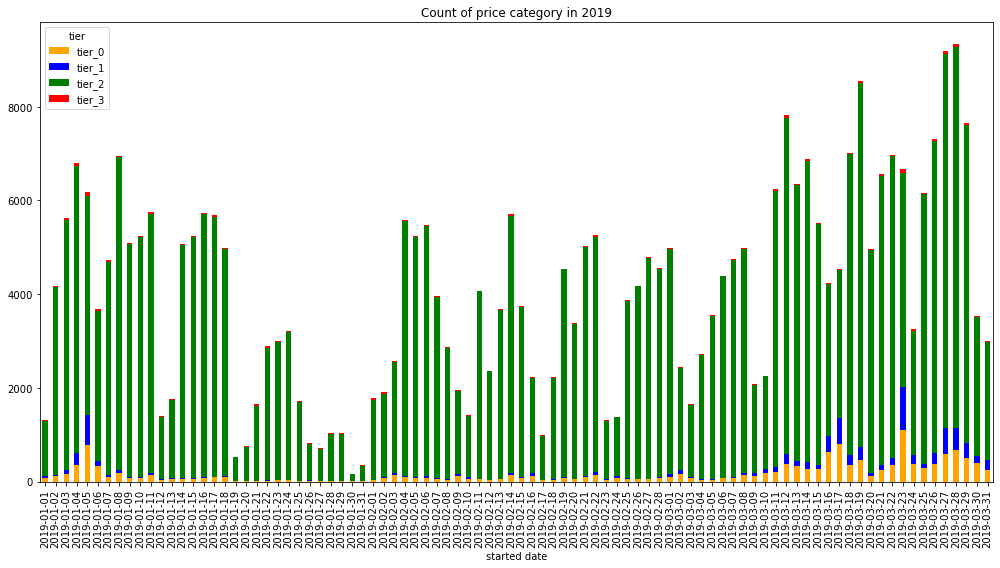

In [206]:
plt.figure(dpi=200)
dfp.plot(kind='bar', stacked=True, figsize =(14,8) ,color = ("orange","blue","green","red"),
                                         title = "Count of price category in 2019");

In [207]:
import plotly.express as px

fig = px.bar(trip_2019_f, x="started date", y="total", color="tier", title="Count of price category in 2019")
fig.show()

In [208]:
df_total = trip_2019df.groupby(['started date']).size().reset_index()
df_total.rename(columns={0: "total"},inplace=True)
df_total

started date  total
0    2019-01-01   1312
1    2019-01-02   4170
2    2019-01-03   5618
3    2019-01-04   6793
4    2019-01-05   6179
..          ...    ...
85   2019-03-27   9192
86   2019-03-28   9335
87   2019-03-29   7650
88   2019-03-30   3529
89   2019-03-31   3004

[90 rows x 2 columns]

In [209]:
df_new = trip_2019df.groupby(['started date','usertype','tier']).size().reset_index()
df_new.rename(columns={0: "count"},inplace=True)
df_new

started date    usertype    tier  count
0     2019-01-01    Customer  tier_0     79
1     2019-01-01    Customer  tier_1     48
2     2019-01-01  Subscriber  tier_2   1176
3     2019-01-01  Subscriber  tier_3      9
4     2019-01-02    Customer  tier_0    108
..           ...         ...     ...    ...
352   2019-03-30  Subscriber  tier_3     24
353   2019-03-31    Customer  tier_0    256
354   2019-03-31    Customer  tier_1    201
355   2019-03-31  Subscriber  tier_2   2521
356   2019-03-31  Subscriber  tier_3     26

[357 rows x 4 columns]

In [210]:
df_count = df_new.merge(df_total, how = "left", on = "started date")
df_count

started date    usertype    tier  count  total
0     2019-01-01    Customer  tier_0     79   1312
1     2019-01-01    Customer  tier_1     48   1312
2     2019-01-01  Subscriber  tier_2   1176   1312
3     2019-01-01  Subscriber  tier_3      9   1312
4     2019-01-02    Customer  tier_0    108   4170
..           ...         ...     ...    ...    ...
352   2019-03-30  Subscriber  tier_3     24   3529
353   2019-03-31    Customer  tier_0    256   3004
354   2019-03-31    Customer  tier_1    201   3004
355   2019-03-31  Subscriber  tier_2   2521   3004
356   2019-03-31  Subscriber  tier_3     26   3004

[357 rows x 5 columns]

### calculate the percentage of each tier by date

In [211]:
df_count['percentage'] = (df_count['count']/df_count['total'])*100
df_count

started date    usertype    tier  count  total  percentage
0     2019-01-01    Customer  tier_0     79   1312    6.021341
1     2019-01-01    Customer  tier_1     48   1312    3.658537
2     2019-01-01  Subscriber  tier_2   1176   1312   89.634146
3     2019-01-01  Subscriber  tier_3      9   1312    0.685976
4     2019-01-02    Customer  tier_0    108   4170    2.589928
..           ...         ...     ...    ...    ...         ...
352   2019-03-30  Subscriber  tier_3     24   3529    0.680079
353   2019-03-31    Customer  tier_0    256   3004    8.521971
354   2019-03-31    Customer  tier_1    201   3004    6.691079
355   2019-03-31  Subscriber  tier_2   2521   3004   83.921438
356   2019-03-31  Subscriber  tier_3     26   3004    0.865513

[357 rows x 6 columns]

In [212]:
d_tier0 = df_count.loc[df_count["tier"]=="tier_0"]
d_tier1 = df_count.loc[df_count["tier"]=="tier_1"]
d_tier2 = df_count.loc[df_count["tier"]=="tier_2"]
d_tier3 = df_count.loc[df_count["tier"]=="tier_3"]
d_tier0

started date  usertype    tier  count  total  percentage
0     2019-01-01  Customer  tier_0     79   1312    6.021341
4     2019-01-02  Customer  tier_0    108   4170    2.589928
8     2019-01-03  Customer  tier_0    152   5618    2.705589
12    2019-01-04  Customer  tier_0    347   6793    5.108200
16    2019-01-05  Customer  tier_0    777   6179   12.574850
..           ...       ...     ...    ...    ...         ...
337   2019-03-27  Customer  tier_0    588   9192    6.396867
341   2019-03-28  Customer  tier_0    682   9335    7.305838
345   2019-03-29  Customer  tier_0    511   7650    6.679739
349   2019-03-30  Customer  tier_0    398   3529   11.277982
353   2019-03-31  Customer  tier_0    256   3004    8.521971

[90 rows x 6 columns]

## Plot for percentage of price category in 2019

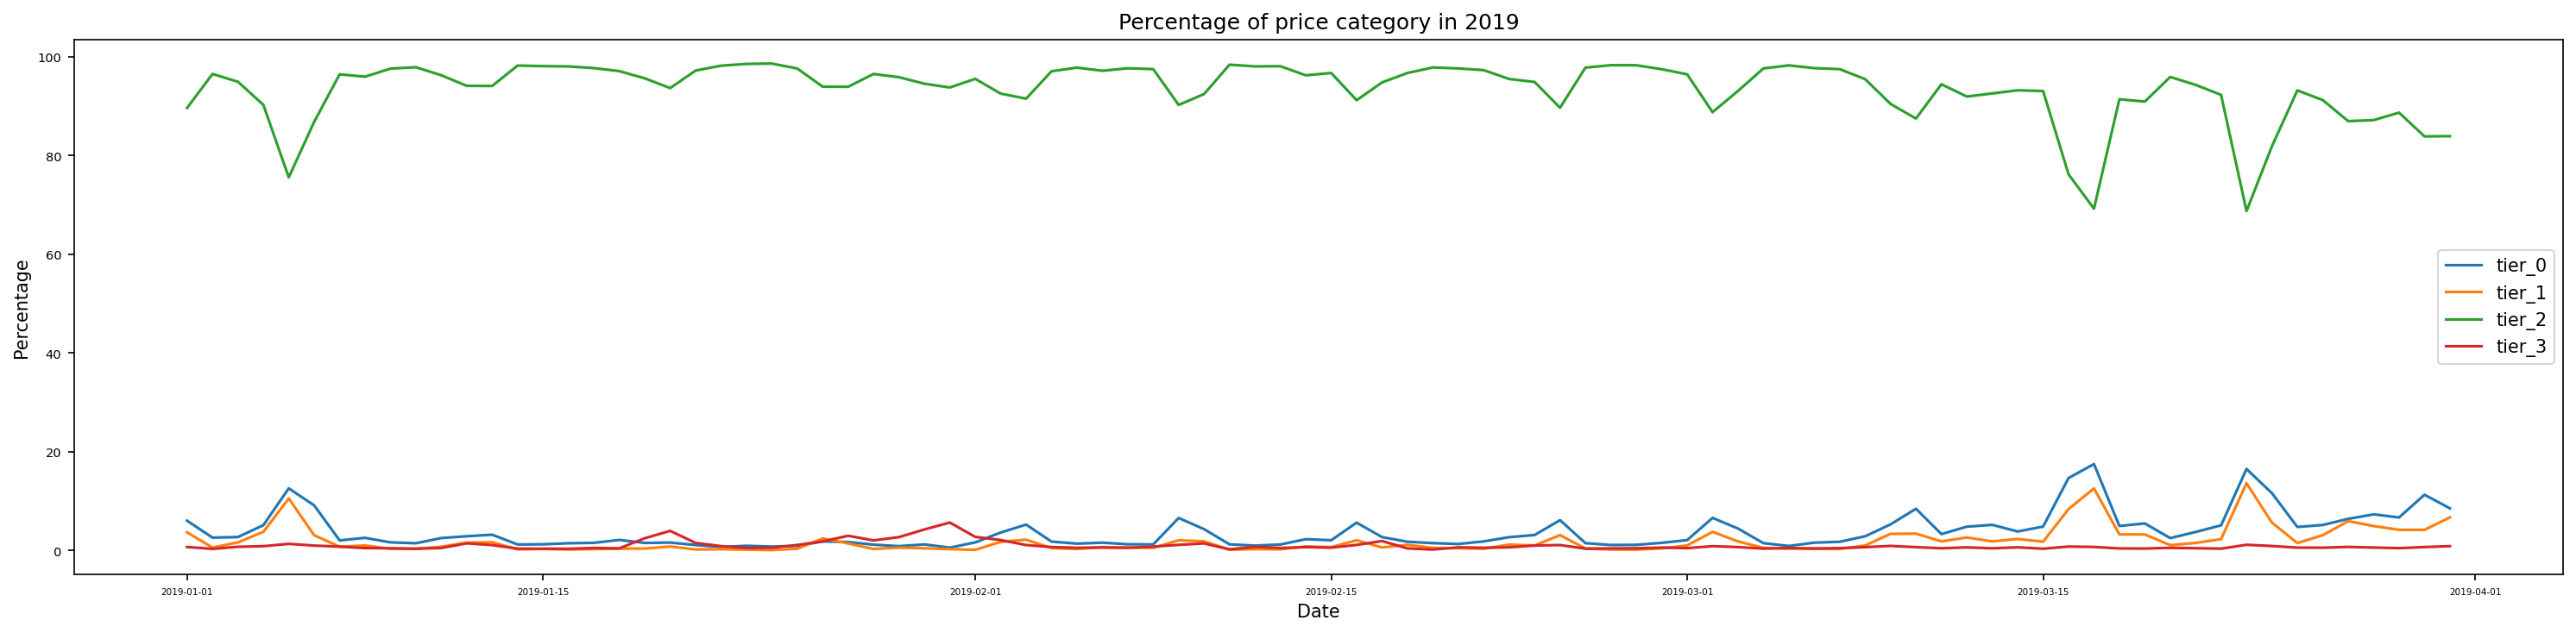

In [213]:
## percentage of people
plt.figure(dpi=150)
plt.plot(d_tier0["started date"], d_tier0["percentage"], label = "tier_0")
plt.plot(d_tier1["started date"], d_tier1["percentage"], label = "tier_1")
plt.plot(d_tier2["started date"], d_tier2["percentage"], label = "tier_2")
plt.plot(d_tier3["started date"], d_tier3["percentage"], label = "tier_3")
plt.xticks(fontsize=5)
plt.yticks(fontsize=7)
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title("Percentage of price category in 2019")
plt.legend()
plt.show()

In [214]:
import plotly.express as px

# d_tier0 = df_count.loc[df_count["tier"]=="tier_0"]
fig = px.line(df_count, x="started date", y="percentage",color = "tier", title = "Percentage of price category in 2019")
fig.show()

## Trip Duration & Usertype

In [215]:
df1 = pd.read_csv("Divvy_Trips_2019_Q1.csv")
df2 = pd.read_csv("Divvy_Trips_2020_Q1.csv")

In [216]:
member_num_2019 = df1[df1['usertype'] == 'Subscriber'].shape[0]
member_num_2019

341906

In [217]:
casual_num_2019 = df1[df1['usertype'] == 'Customer'].shape[0]
casual_num_2019

23163

In [218]:
member_num_2020 = df2[df2['member_casual'] == 'member'].shape[0]
member_num_2020

378407

In [219]:
casual_num_2020 = df2[df2['member_casual'] == 'casual'].shape[0]
casual_num_2020

48480

In [220]:
# convert to datetime for 2019 dataframe
df1['start_time']= pd.to_datetime(df1['start_time'])
df1['end_time']= pd.to_datetime(df1['end_time'])

In [221]:
# convert to datetime for 2020 dataframe
df2['started_at']= pd.to_datetime(df2['started_at'])
df2['ended_at']= pd.to_datetime(df2['ended_at'])

In [222]:
df1['start_date_day'] = df1['start_time'].dt.date
df2['start_date_day'] = df2['started_at'].dt.date
df2['end_date_day'] = df2['ended_at'].dt.date

In [223]:
((df2[df2['start_date_day'] != df2['end_date_day']].shape[0])/df2.shape[0])*100

0.2698606422776988

In [224]:
df2 = df2[df2['start_date_day'] == df2['end_date_day']]

In [225]:
# calculate the duration difference in seconds for 2020 Q1
df2['diff'] = df2['ended_at'] - df2['started_at']
df2['tripduration'] = df2['diff'].dt.total_seconds()
df2

ride_id rideable_type          started_at  \
0       EACB19130B0CDA4A   docked_bike 2020-01-21 20:06:59   
1       8FED874C809DC021   docked_bike 2020-01-30 14:22:39   
2       789F3C21E472CA96   docked_bike 2020-01-09 19:29:26   
3       C9A388DAC6ABF313   docked_bike 2020-01-06 16:17:07   
4       943BC3CBECCFD662   docked_bike 2020-01-30 08:37:16   
...                  ...           ...                 ...   
426882  ADDAA33CEBCAE733   docked_bike 2020-03-10 10:40:06   
426883  82B10FA3994BC66A   docked_bike 2020-03-07 15:25:55   
426884  AA0D5AAA0B59C8AA   docked_bike 2020-03-01 13:12:38   
426885  3296360A7BC20FB8   docked_bike 2020-03-07 18:02:45   
426886  064EC7698E4FF9B3   docked_bike 2020-03-08 13:03:57   

                  ended_at         start_station_name  start_station_id  \
0      2020-01-21 20:14:30   Western Ave & Leland Ave               239   
1      2020-01-30 14:26:22    Clark St & Montrose Ave               234   
2      2020-01-09 19:32:17     Broadway & Belmont Ave               296   
3      2020-01-06 16:25:56     Clark St & Randolph St                51   
4      2020-01-30 08:42:48       Clinton St & Lake St                66   
...                    ...                        ...               ...   
426882 2020-03-10 10:40:07                      HQ QR               675   
426883 2020-03-07 16:14:03      Rush St & Superior St               161   
426884 2020-03-01 13:38:29     Clark St & Lincoln Ave               141   
426885 2020-03-07 18:13:18  Franklin St & Illinois St               672   
426886 2020-03-08 13:32:27      Dearborn St & Erie St               110   

                      end_station_name  end_station_id  start_lat  start_lng  \
0                Clark St & Leland Ave           326.0    41.9665   -87.6884   
1       Southport Ave & Irving Park Rd           318.0    41.9616   -87.6660   
2             Wilton Ave & Belmont Ave           117.0    41.9401   -87.6455   
3             Fairbanks Ct & Grand Ave            24.0    41.8846   -87.6319   
4                Wells St & Hubbard St           212.0    41.8856   -87.6418   
...                                ...             ...        ...        ...   
426882                           HQ QR           675.0    41.8899   -87.6803   
426883    Sheridan Rd & Irving Park Rd           240.0    41.8958   -87.6259   
426884       Ashland Ave & Division St           210.0    41.9157   -87.6346   
426885    Stetson Ave & South Water St           264.0    41.8910   -87.6355   
426886           Michigan Ave & Oak St            85.0    41.8940   -87.6293   

        end_lat  end_lng member_casual start_date_day end_date_day  \
0       41.9671 -87.6674        member     2020-01-21   2020-01-21   
1       41.9542 -87.6644        member     2020-01-30   2020-01-30   
2       41.9402 -87.6530        member     2020-01-09   2020-01-09   
3       41.8918 -87.6206        member     2020-01-06   2020-01-06   
4       41.8899 -87.6343        member     2020-01-30   2020-01-30   
...         ...      ...           ...            ...          ...   
426882  41.8899 -87.6803        casual     2020-03-10   2020-03-10   
426883  41.9542 -87.6544        member     2020-03-07   2020-03-07   
426884  41.9035 -87.6677        casual     2020-03-01   2020-03-01   
426885  41.8868 -87.6223        member     2020-03-07   2020-03-07   
426886  41.9010 -87.6238        casual     2020-03-08   2020-03-08   

                  diff  tripduration  
0      0 days 00:07:31         451.0  
1      0 days 00:03:43         223.0  
2      0 days 00:02:51         171.0  
3      0 days 00:08:49         529.0  
4      0 days 00:05:32         332.0  
...                ...           ...  
426882 0 days 00:00:01           1.0  
426883 0 days 00:48:08        2888.0  
426884 0 days 00:25:51        1551.0  
426885 0 days 00:10:33         633.0  
426886 0 days 00:28:30        1710.0  

[425735 rows x 17 columns]

In [226]:
df1['tripduration'] = pd.to_numeric(df1['tripduration'], errors='coerce')
df1['tripduration']

0         390.0
1         441.0
2         829.0
3           NaN
4         364.0
          ...  
365064    757.0
365065    332.0
365066    846.0
365067    178.0
365068    448.0
Name: tripduration, Length: 365069, dtype: float64

In [227]:
# check the average duration for each person of member and casual
total_duration_2019 = df1.groupby(['start_date_day', 'usertype'])['tripduration'].sum()
totalnum_2019 = df1.groupby(['start_date_day', 'usertype'])['usertype'].count()

# type(total_duration_2019)
# type(totalnum_2019)

average_duration_2019 = round(total_duration_2019/totalnum_2019, 2)
average_duration_2019

start_date_day  usertype  
2019-01-01      Customer      196.42
                Subscriber    378.73
2019-01-02      Customer      309.50
                Subscriber    398.36
2019-01-03      Customer      196.88
                               ...  
2019-03-29      Subscriber    388.88
2019-03-30      Customer      218.53
                Subscriber    375.99
2019-03-31      Customer      161.35
                Subscriber    377.37
Length: 180, dtype: float64

In [228]:
# check the average duration for each person of member and casual
total_duration_2020 = df2.groupby(['start_date_day', 'member_casual'])['tripduration'].sum()
totalnum_2020 = df2.groupby(['start_date_day', 'member_casual'])['member_casual'].count()

# type(total_duration_2019)
# type(totalnum_2019)

average_duration_2020 = round(total_duration_2020/totalnum_2020, 2)
average_duration_2020

start_date_day  member_casual
2020-01-01      casual           2127.66
                member            716.29
2020-01-02      casual           1950.94
                member            674.67
2020-01-03      casual           1696.10
                                  ...   
2020-03-29      member            880.07
2020-03-30      casual           1872.82
                member            880.01
2020-03-31      casual           2029.95
                member            885.03
Length: 182, dtype: float64

In [229]:
average_duration_2019 = average_duration_2019.to_frame().reset_index()
# avg_duration_df = average_duration.to_frame()
# avg_duration_df = test_df.reset_index()

average_duration_2019.rename(columns={0: "average duration"},inplace=True)
average_duration_2019

start_date_day    usertype  average duration
0       2019-01-01    Customer            196.42
1       2019-01-01  Subscriber            378.73
2       2019-01-02    Customer            309.50
3       2019-01-02  Subscriber            398.36
4       2019-01-03    Customer            196.88
..             ...         ...               ...
175     2019-03-29  Subscriber            388.88
176     2019-03-30    Customer            218.53
177     2019-03-30  Subscriber            375.99
178     2019-03-31    Customer            161.35
179     2019-03-31  Subscriber            377.37

[180 rows x 3 columns]

In [230]:
average_duration_2020 = average_duration_2020.to_frame().reset_index()
average_duration_2020.rename(columns={0: "average duration"},inplace=True)
average_duration_2020

start_date_day member_casual  average duration
0       2020-01-01        casual           2127.66
1       2020-01-01        member            716.29
2       2020-01-02        casual           1950.94
3       2020-01-02        member            674.67
4       2020-01-03        casual           1696.10
..             ...           ...               ...
177     2020-03-29        member            880.07
178     2020-03-30        casual           1872.82
179     2020-03-30        member            880.01
180     2020-03-31        casual           2029.95
181     2020-03-31        member            885.03

[182 rows x 3 columns]

In [231]:
# dataframe of average trip duration of member
member_2019 = average_duration_2019.loc[average_duration_2019["usertype"] == 'Subscriber']
member_2019

start_date_day    usertype  average duration
1       2019-01-01  Subscriber            378.73
3       2019-01-02  Subscriber            398.36
5       2019-01-03  Subscriber            394.62
7       2019-01-04  Subscriber            394.00
9       2019-01-05  Subscriber            359.49
..             ...         ...               ...
171     2019-03-27  Subscriber            382.86
173     2019-03-28  Subscriber            387.26
175     2019-03-29  Subscriber            388.88
177     2019-03-30  Subscriber            375.99
179     2019-03-31  Subscriber            377.37

[90 rows x 3 columns]

In [232]:
# dataframe of average trip duration of casual
casual_2019 = average_duration_2019.loc[average_duration_2019["usertype"] == 'Customer']
casual_2019

start_date_day  usertype  average duration
0       2019-01-01  Customer            196.42
2       2019-01-02  Customer            309.50
4       2019-01-03  Customer            196.88
6       2019-01-04  Customer            159.34
8       2019-01-05  Customer            147.52
..             ...       ...               ...
170     2019-03-27  Customer            141.19
172     2019-03-28  Customer            154.55
174     2019-03-29  Customer            183.89
176     2019-03-30  Customer            218.53
178     2019-03-31  Customer            161.35

[90 rows x 3 columns]

In [233]:
df_2019 = member_2019.merge(casual_2019, how = "left", on = "start_date_day")
df_2019

start_date_day  usertype_x  average duration_x usertype_y  \
0      2019-01-01  Subscriber              378.73   Customer   
1      2019-01-02  Subscriber              398.36   Customer   
2      2019-01-03  Subscriber              394.62   Customer   
3      2019-01-04  Subscriber              394.00   Customer   
4      2019-01-05  Subscriber              359.49   Customer   
..            ...         ...                 ...        ...   
85     2019-03-27  Subscriber              382.86   Customer   
86     2019-03-28  Subscriber              387.26   Customer   
87     2019-03-29  Subscriber              388.88   Customer   
88     2019-03-30  Subscriber              375.99   Customer   
89     2019-03-31  Subscriber              377.37   Customer   

    average duration_y  
0               196.42  
1               309.50  
2               196.88  
3               159.34  
4               147.52  
..                 ...  
85              141.19  
86              154.55  
87              183.89  
88              218.53  
89              161.35  

[90 rows x 5 columns]

In [234]:
# dataframe of average trip duration of member
member_2020 = average_duration_2020.loc[average_duration_2020["member_casual"] == 'member']
member_2020

start_date_day member_casual  average duration
1       2020-01-01        member            716.29
3       2020-01-02        member            674.67
5       2020-01-03        member            635.06
7       2020-01-04        member            614.04
9       2020-01-05        member            631.80
..             ...           ...               ...
173     2020-03-27        member            846.37
175     2020-03-28        member           1006.37
177     2020-03-29        member            880.07
179     2020-03-30        member            880.01
181     2020-03-31        member            885.03

[91 rows x 3 columns]

In [235]:
# dataframe of average trip duration of member
casual_2020 = average_duration_2020.loc[average_duration_2020["member_casual"] == 'casual']
casual_2020

start_date_day member_casual  average duration
0       2020-01-01        casual           2127.66
2       2020-01-02        casual           1950.94
4       2020-01-03        casual           1696.10
6       2020-01-04        casual           1615.72
8       2020-01-05        casual           2034.07
..             ...           ...               ...
172     2020-03-27        casual           1937.33
174     2020-03-28        casual           1849.25
176     2020-03-29        casual           1900.38
178     2020-03-30        casual           1872.82
180     2020-03-31        casual           2029.95

[91 rows x 3 columns]

In [236]:
df_2020 = member_2020.merge(casual_2020, how = "left", on = "start_date_day")
df_2020

start_date_day member_casual_x  average duration_x member_casual_y  \
0      2020-01-01          member              716.29          casual   
1      2020-01-02          member              674.67          casual   
2      2020-01-03          member              635.06          casual   
3      2020-01-04          member              614.04          casual   
4      2020-01-05          member              631.80          casual   
..            ...             ...                 ...             ...   
86     2020-03-27          member              846.37          casual   
87     2020-03-28          member             1006.37          casual   
88     2020-03-29          member              880.07          casual   
89     2020-03-30          member              880.01          casual   
90     2020-03-31          member              885.03          casual   

    average duration_y  
0              2127.66  
1              1950.94  
2              1696.10  
3              1615.72  
4              2034.07  
..                 ...  
86             1937.33  
87             1849.25  
88             1900.38  
89             1872.82  
90             2029.95  

[91 rows x 5 columns]

## Plot for trip duration of member/casual riders in 2019 

In [237]:
newnames = {'average duration_x':'member_duration', 'average duration_y': 'casual_duration'}

to_plot = [v for v in list(df_2019.columns) if v.startswith('average duration')]
fig = px.line(df_2019, x=df_2019.start_date_day, y=to_plot)
fig.update_layout(
    title="2019 Q1 Daily Trip Duration",
    xaxis_title="Date",
    yaxis_title="Trip Duration (sec)")
fig.update_layout(legend_title_text='User Type')
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()

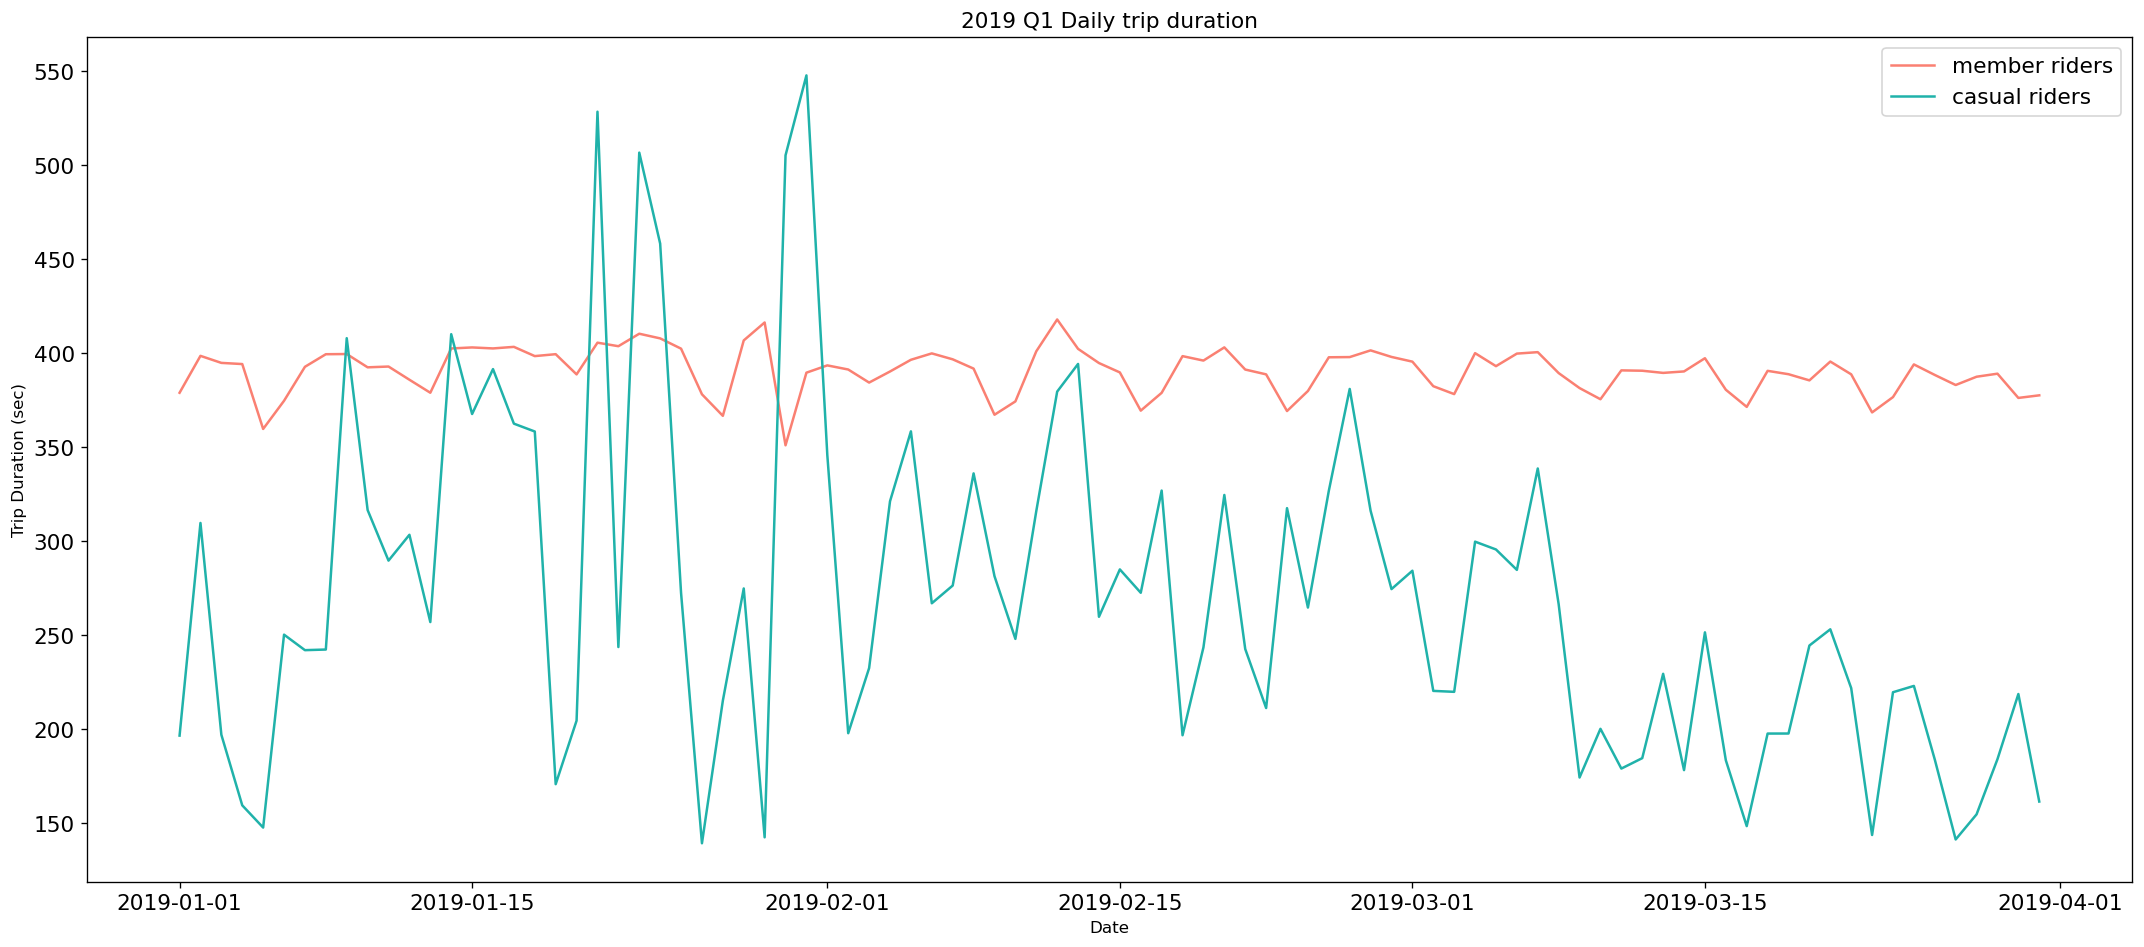

In [238]:
fig = plt.figure(figsize=(18, 8),dpi=120)
ax = fig.add_subplot(111)
ax.plot(member_2019['start_date_day'], member_2019['average duration'], label='member riders', color='salmon')
ax.plot(casual_2019['start_date_day'], casual_2019['average duration'], label='casual riders', color='lightseagreen')
plt.title('2019 Q1 Daily trip duration', fontsize=13)
plt.xlabel('Date')
plt.ylabel('Trip Duration (sec)')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13);

## Plot for trip duration of member/casual riders in 2020

In [239]:
newnames = {'average duration_x':'member_duration', 'average duration_y': 'casual_duration'}

to_plot = [v for v in list(df_2020.columns) if v.startswith('average duration')]
fig = px.line(df_2020, x=df_2020.start_date_day, y=to_plot)
fig.update_layout(
    title="2020 Q1 Daily Trip Duration",
    xaxis_title="Date",
    yaxis_title="Trip Duration (sec)")
fig.update_layout(legend_title_text='User Type')
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()

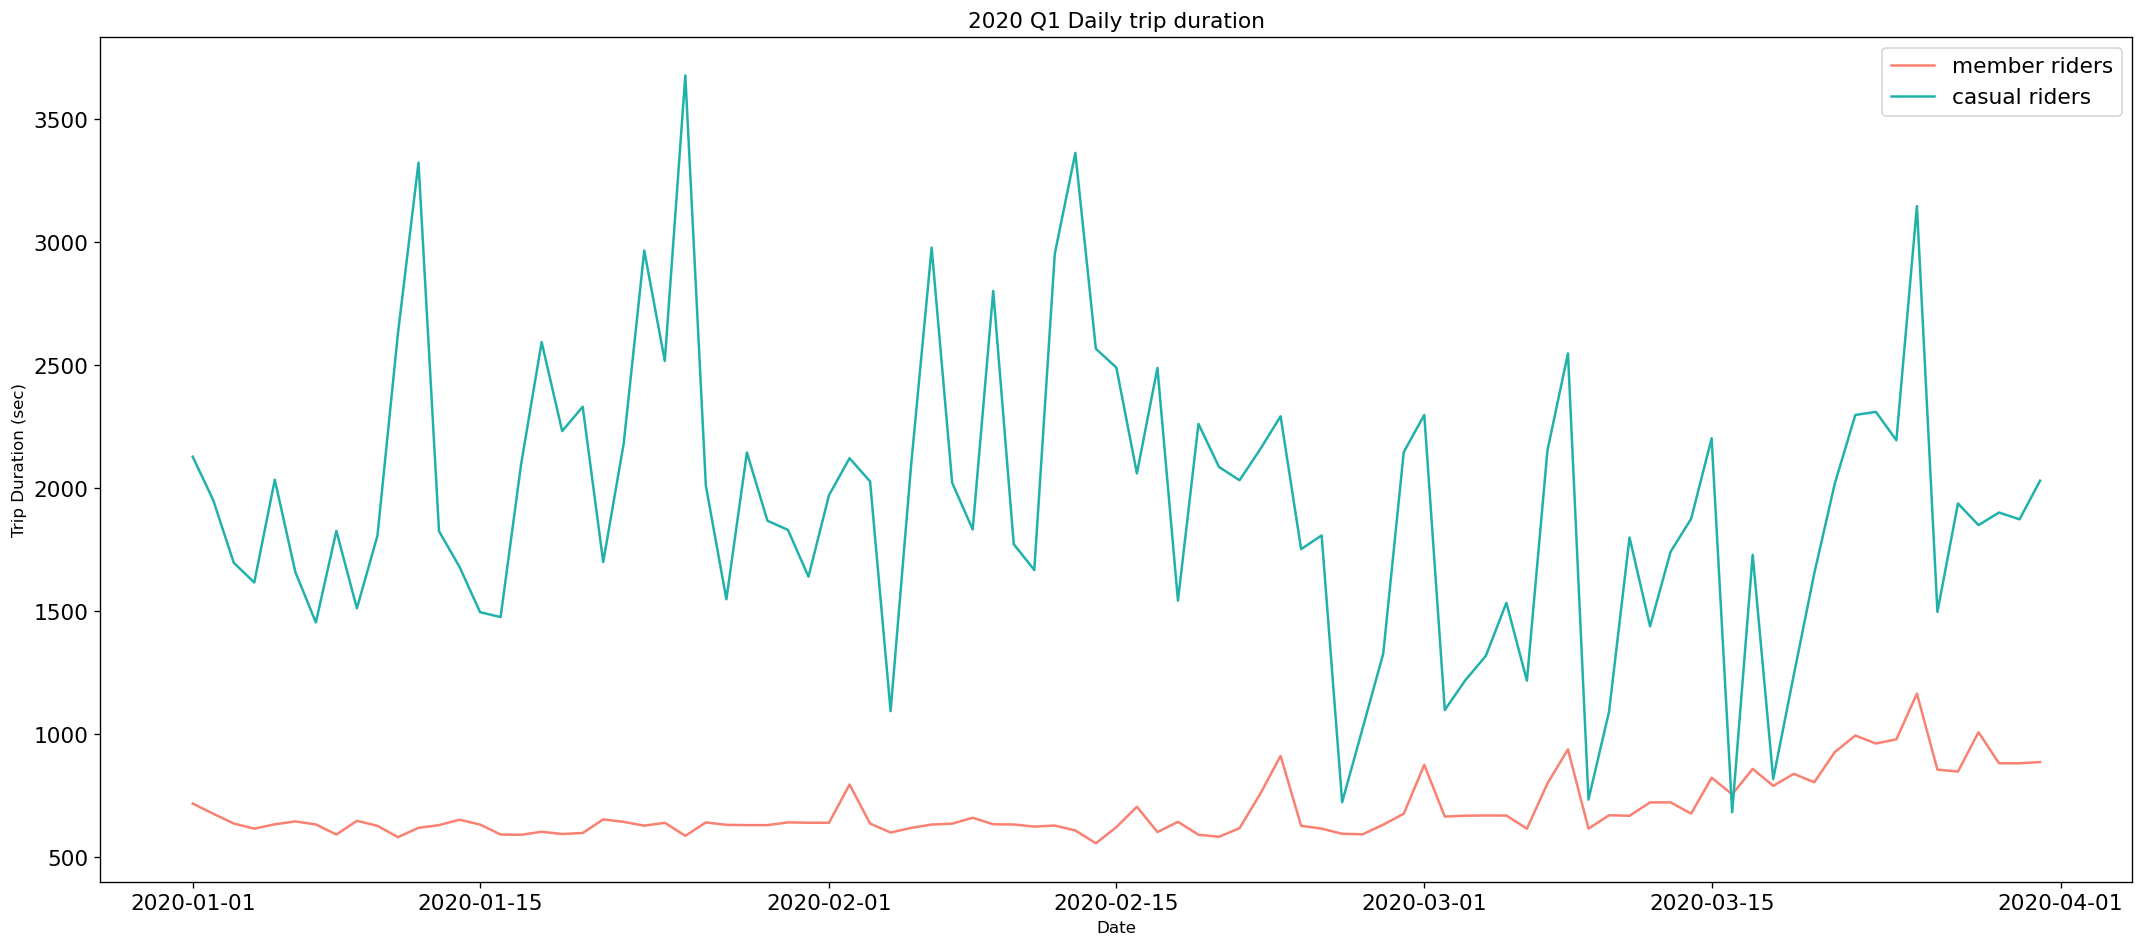

In [240]:
fig = plt.figure(figsize=(18, 8),dpi=120)
ax = fig.add_subplot(111)
ax.plot(member_2020['start_date_day'], member_2020['average duration'], label='member riders', color='salmon')
ax.plot(casual_2020['start_date_day'], casual_2020['average duration'], label='casual riders', color='lightseagreen')
plt.title('2020 Q1 Daily trip duration', fontsize=13)
plt.xlabel('Date')
plt.ylabel('Trip Duration (sec)')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

### References
1. pandas—Python Data Analysis Library. (n.d.). Retrieved December 15, 2021, from https://pandas.pydata.org/
2. Matplotlib documentation—Matplotlib 3.5.1 documentation. (n.d.). Retrieved December 15, 2021, from https://matplotlib.org/stable/
3. Plotly Open Source Graphing Libraries. (n.d.). Retrieved December 15, 2021, from https://plotly.com/api/
4. Stack Overflow—Where Developers Learn, Share, & Build Careers. (n.d.). Stack Overflow. Retrieved December 15, 2021, from https://stackoverflow.com/
5. python—Replace several coordinates by its mean value grouped by multiindex Pandas. (n.d.). Geographic Information Systems Stack Exchange. Retrieved December 15, 2021, from https://gis.stackexchange.com/questions/292306/replace-several-coordinates-by-its-mean-value-grouped-by-multiindex-pandas